<a href="https://colab.research.google.com/github/joan-chep/WEEK-9_IP_CORE/blob/main/Moringa_Data_Science_Core_W9_Independent_Project_2022_02_Joan_Chepkwony_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITANIC MACHINE LEARNING FROM DISASTER**

**1. Defining The Question.**

Implementing K-nearest neighbor (KNN) classifier  and a Naive Bayes classifier in our datasets.

**2. Defining Metric of Success.**

We will achieve our onbjectives when;

(a) The model achieves atleast 80% accuracy

(b) Identify the most importaint features for predicting the chances of survival

(c) Identify the most importaint features for predicting the chances of survival

**3. Understanding the Context.**

The RMS Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time)[a] on Sunday, 14 April 1912. Her sinking two hours and forty minutes later at 02:20 (ship's time; 05:18 GMT) on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime maritime disasters in history.

 The immediate cause of RMS Titanic's demise was a collision with an iceberg that caused the ocean liner to sink on April 14–15, 1912. While the ship could reportedly stay afloat if as many as 4 of its 16 compartments were breached, the impact had affected at least 5 compartments.

**4. Recording the Experimental Design.**

**5. Data Relevance.**

Our data is relevant considering the fact that during the event, children and passengers on the first class were given higher priority when it came to giving out of life boats. We have both these columns in our dataset which thus help us in predicting whether a person survived or not in the Titanic crash

**Loading the Dataset**

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Reading The Dataset

In [ ]:
train = pd.read_csv('/content/train (5).csv')
test = pd.read_csv('/content/test (1).csv')

Viewing The Dataset

Train Dataset

In [ ]:
# Viewing the first five values in the train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Viewing the last five values in the train dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Test Dataset

In [ ]:
# Viewing the first five values in the test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Viewing the last five values in the test dataset
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# Checking for datatypes in the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Checking for the shape of the train dataset
train.shape

(891, 12)

The dataset has 891 rows and 12 columns

In [ ]:
# Checking the Columns in the dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Checking for the description of the train dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Checking for unique values in each column
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**DATA CLEANING**

(a) **Validity**

In [ ]:
# Dropping any unnecessary columns from the train dataset
train.drop(['PassengerId','Ticket'], axis = 1, inplace=True)

# Dropping any unnecessary columns from the test set
test.drop(['PassengerId','Ticket'], axis = 1, inplace = True)

(b) **Completeness**

In [ ]:
# Checking for missing values in our train dataset
print(train.isnull().sum())
print('\n')
# Checking for missing values in our test set
print("The null values in our test set")
print(test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


The null values in our test set
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64


From the observation we see that age, fare, cabin and embarked columns have missing values

Missing Values in Age Column

In [ ]:
# We will use the mean of age in both datasets
mean1 = train['Age'].mean()
train['Age'].fillna(mean1, inplace=True)

mean2 = test['Age'].mean()
test['Age'].fillna(mean2, inplace=True)

Missing values in Cabin Column

In [ ]:
# We can introduce a new column, Cabin_Known in both datasets
train['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in train['Cabin']]

train.drop('Cabin', axis=1, inplace=True)

test['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in test['Cabin']]

# We then drop the former Cabin column 
test.drop('Cabin', axis=1, inplace=True)

Missing Values in Embarked Column

In [ ]:
# We use the mode
mode1 = train['Embarked'].mode()
train['Embarked'].fillna(mode1, inplace=True)

**(c) Consistency**

In [ ]:
# Checking for duplicate values in our datasets
print(train.duplicated().sum())

print(test.duplicated().sum())

0
0


There are no duplicates in our datasets

(d) ***Uniformity***

In [ ]:
# Changing column names to upper case and placing underscore to make the column names uniform in the train dataset
train.columns = train.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Changing column names to upper case and placing underscore to make the column names uniform in the test dataset
test.columns = test.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

**(e) Outliers**

In [ ]:
# Checking for the outliers using quantiles
# We check fo the outliers within the numerical variables
numerical = ['age','sibsp','parch','fare']
Q1 = train[numerical].quantile(0.25)
Q3 = train[numerical].quantile(0.75)
IQR = Q3 - Q1
# Dealing with the outliers by removing outliers based on the IQR range 
train.df = train[numerical][~((train[numerical] < (Q1 - 1.5 * IQR)) | (train[numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(train.df.shape)

# Printing the shape of our old dataset
print(train.shape)

(577, 4)
(891, 10)


From the observation we can see that we have outliers on our dataset but we will not drop them since they represent true values of the data.

**EXPLORATORY DATA ANALYSIS**

Univariate Analysis

Categorical Variables

Frequency Tables

In [ ]:
# Frequency Tables
print(train['embarked'].value_counts())
print('\n')
print(train['pclass'].value_counts())
print('\n')
print(train['survived'].value_counts())
print('\n')
print(train['sex'].value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64


3    491
1    216
2    184
Name: pclass, dtype: int64


0    549
1    342
Name: survived, dtype: int64


male      577
female    314
Name: sex, dtype: int64


Majority of the passengers in our passengers in our Titanic dataset, exactly 549, survived the crash while 342 passengers did not survive.

Majority of the passengers in our Titanic dataset were male, exactly 577 as compared to the 314 female passengers.

Majority of the passengers embarked at the Southampton port, exactly 644 out of the total 891 passengers.

Majority of the passengers were in the third passenger class, exactly 491 out of the total 891 passengers

Pie Charts

Visualization of Embarked column

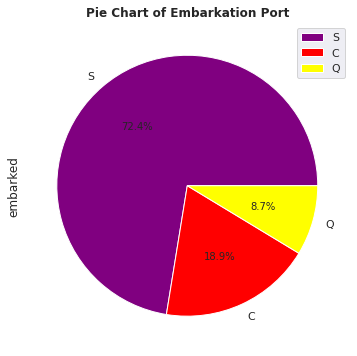

In [ ]:
train['embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['purple','red','yellow'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Embarkation Port', y=1, fontweight='bold')
plt.show()

From the pie chart we can tell that 72.4% of the total passengers embarked at the Southampton port, 18.9% at the Cherboug port and 8.7% at the Queensburg port.

Visualization of Survival Rate

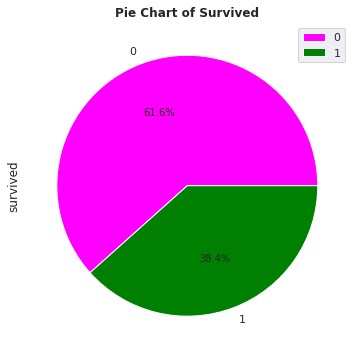

In [ ]:
train['survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['magenta','green'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Survived', y=1, fontweight='bold')
plt.show()


From the pie chart, we can conclude that 61.6% of the total passengers survived in our dataset while 38.4% did not.

Visualization on Gender Distribution

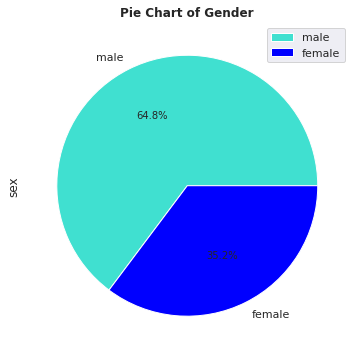

In [ ]:
train['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['turquoise','blue'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Gender', y=1, fontweight='bold')
plt.show()

From the pie chart we can tell that 64.8% of the total passengers in our dataset were male while 35.2% were female.

Numerical Columns

Measures of Central Tendancy

In [ ]:
# Median
train[numerical].median()

age      29.699118
sibsp     0.000000
parch     0.000000
fare     14.454200
dtype: float64

In [ ]:
# Mean 
train[numerical].mean()

age      29.699118
sibsp     0.523008
parch     0.381594
fare     32.204208
dtype: float64

In [ ]:
# Mode
train[numerical].mode()

,age,sibsp,parch,fare
0,29.699118,0,0,8.05


Measures of Dispersion

In [ ]:
# Standard Deviation
train[numerical].std()

age      13.002015
sibsp     1.102743
parch     0.806057
fare     49.693429
dtype: float64

In [ ]:
# Variance
train[numerical].var()

age       169.052400
sibsp       1.216043
parch       0.649728
fare     2469.436846
dtype: float64

In [ ]:
# Quantiles
train[numerical].quantile([0.25,0.5,0.75])

,age,sibsp,parch,fare
0.25,22.000000,0.0,0.0,7.9104
0.50,29.699118,0.0,0.0,14.4542
0.75,35.000000,1.0,0.0,31.0000


In [ ]:
# Range
max = train[numerical].max()
min = train[numerical].min()
range = max - min
print("The range in the dataset is: ", range)

The range in the dataset is:  age       79.5800
sibsp      8.0000
parch      6.0000
fare     512.3292
dtype: float64


In [ ]:
# Kurtosis
train[numerical].kurt()

age       0.966279
sibsp    17.880420
parch     9.778125
fare     33.398141
dtype: float64

In [ ]:
# Skewness
train[numerical].skew()

age      0.434488
sibsp    3.695352
parch    2.749117
fare     4.787317
dtype: float64

Numerical Columns

Box Plots Visualizations

Fare Column

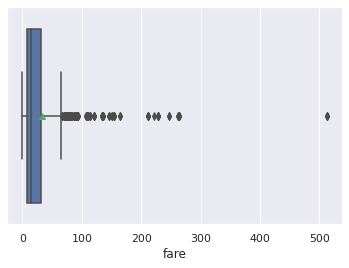

In [ ]:
# Fare 
sns.boxplot(train['fare'], showmeans=True)

Age Column

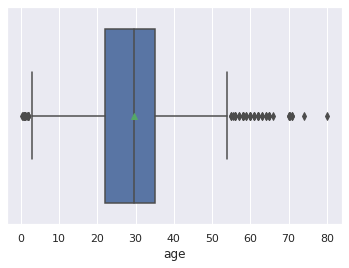

In [ ]:
# Age
sns.boxplot(train['age'], showmeans=True)

Parch Column

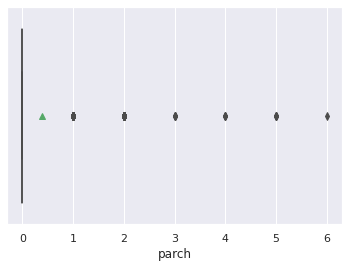

In [ ]:
# Parch
sns.boxplot(train['parch'], showmeans=True)

**Bivariate Analysis**

Numerical and Numerical Variables

Correlation

In [ ]:
# Let's display the correlations between the variables
corr = train.corr()
corr

,survived,pclass,age,sibsp,parch,fare,cabin_known
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.316912
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.725541
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.233123
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.040460
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.036987
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.482075
cabin_known,0.316912,-0.725541,0.233123,-0.040460,0.036987,0.482075,1.000000


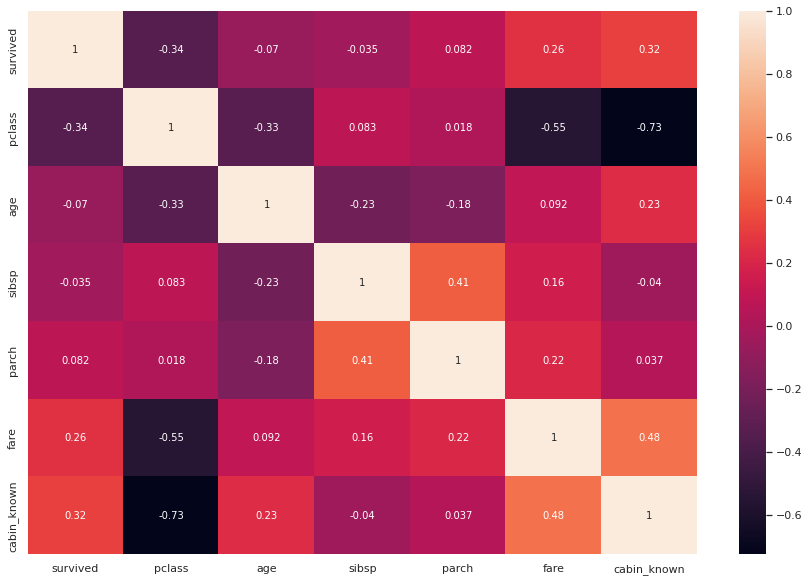

In [ ]:
# Visualizing the correlation using a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True)
plt.show()

The correlations are low which means most of the features are independent

There is low multi-collinearity

**Feature Engineering**

In [ ]:
# Lets check the unique values in our name column
train['name'].unique()
#print(train['name'].nunique())

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [ ]:
# The count of the different names and titles in our dataset
train.name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: name, Length: 891, dtype: int64

We can acknowledge that there are so many different names which makes sense since names are discrete values. Therefore we can distinguish between common (Mr., Mrs., Miss.) since they are the majority and the uncommon ones like Dr., Rev., etc

In [ ]:
# After viewing the data, we notice there is a name column which has quite the information
# It would be difficult to use this column since it has very many distinct names
# We can strip the names and pick common and uncommon titles
# Common titles can be such as Mr., Mrs., Miss. while uncommon like Dr.,Capt etc
train['title'] = train['name'].apply(lambda y: y.split(',')[1].strip().split(' ')[0])
train['title'] = [0 if y in ['Mr.', 'Mrs.', 'Miss.'] else 1 for y in train['title']]
train.drop('name', axis=1, inplace=True)

In [ ]:
# Checking the count of titles in the title column
train['title'].value_counts()

0    824
1     67
Name: title, dtype: int64

In [ ]:
# Previewing the title column
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,cabin_known,title
0,0,3,male,22.0,1,0,7.2500,S,0,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0


0 represents the common titles (Mr., Mrs., Miss.)

1 represents the other titles such as Dr., Rev., Capt etc

**Implementing K-nearest Neighbor (KNN) Classifier** 

In [ ]:
# Previewing the titanic dataset
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,cabin_known,title
0,0,3,male,22.0,1,0,7.2500,S,0,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0


Performing Encoding on Categorical Variables using Label Encoding age column and getting dummies on the embarked column.

In [ ]:
# Encoding the categorical columns
# Age column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['sex'] = le.fit_transform(train['sex'])

In [ ]:
# Get dummies on the embarked column 
dums = pd.get_dummies(train['embarked'], prefix="Point")
train = train.join(dums)
train.drop('embarked', axis=1, inplace=True)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin_known,title,Point_C,Point_Q,Point_S
0,0,3,1,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,0,1


In [ ]:
# Define the attributes and labels in our titanic dataset 
X = train.iloc[:, 1:] 
y = train['survived'].values 

1.  80-20 Train Set and Test Set split

In [ ]:
# Split the data in the 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Perform feature scalling to ensure uniform evaluation of the features in our dataset

In [ ]:
# We will use the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Initializing the kNeighborsClassifier for training and prediction

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
 #initializing the class with the n_neighbors parameter set to 5
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Making predictions on the test data

In [ ]:
# Making predictions
y_pred = classifier.predict(X_test)

Evaluating the algorithm 

In [ ]:
# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[89 16]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
# Introduce the accuracy score from the metrics library
from sklearn.metrics import accuracy_score
print("The accuracy score of our kNN classifier is: ", accuracy_score(y_test, y_pred)*100)

The accuracy score of our kNN classifier is:  81.56424581005587


The KNN accuracy score is 81.56% when the ratio of the train to test was 80:20.

2. 70:30 Train Set and Test Set split

In [ ]:
# Splitting the data using the 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# We will use the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
#initializing the class with a parameter
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Making predictions on the test data
y_pred = classifier.predict(X_test)

In [ ]:
# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[137  20]
 [ 33  78]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.70      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



Evaluating the accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
print("The accuracy score for 70-30 split: ", accuracy_score(y_test, y_pred)*100)

The accuracy score for 70-30 split:  80.22388059701493


The KNN accuracy score is 80.22% when the data is split in the ratio of 70:30

3. 70:30 Train Set and Test Set split

In [ ]:
# Split the data using the 60:40 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
# We will use the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #class
classifier = KNeighborsClassifier(n_neighbors=5) #initializing the class with a parameter
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Making predictions on the test data
y_pred = classifier.predict(X_test)

In [ ]:
# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[188  28]
 [ 42  99]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       216
           1       0.78      0.70      0.74       141

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357



Evaluating the accuracy score

In [ ]:
# Import accuracy score from the metrics library
from sklearn.metrics import accuracy_score
print("The accuarcy score of the 60-40 split model is ", accuracy_score(y_test, y_pred)*100)

The accuarcy score of the 60-40 split model is  80.3921568627451


The KNN accuracy score is 80.39% when the data is split in the ratio of 60:40

**Findings**

The highest accuracy score of 81.56% was achieved with the 80-20 train-test split when the n_neighbors parameter of the kNN Classifier model was set to 5.0

**Challenging the Solution**

1. Performing Principle Component Analysis

In [ ]:
# Define the attributes and labels in our titanic dataset 
X = train.iloc[:, 1:] 
y = train['survived'].values

In [ ]:
# Split the data in the 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# performing feature scaling
# using the StandardScaler for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Import the PCA class from the sklearn library
from sklearn.decomposition import PCA

# Specify the n_components as 1 so as to check the performance of our classifier with a single linear discriminant
pca = PCA(n_components=4) # 1 - 72%, 2 - 77%, 3 - 79%, 4 - 82% 
X_train = pca.fit_transform(X_train, y_train)
X_test = pca.transform(X_test)

In [ ]:
# Introducing kNN classifier and fit the model with the train data
from sklearn.neighbors import KNeighborsClassifier 
 #initializing the class with a parameter
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Making predictions on the test data
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the performance of kNN classifier after performing Principal Component Analysis
# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[89 16]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
# Evaluating the performance of our classifier using the accuracy score metric
# Import accuracy score from the metrics library
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8156424581005587


The accuracy score after performing Principal Component Analysis is 81.56%

**Performing Linear Discriminant Analysis**

In [ ]:
# Define the attributes and labels in our titanic dataset 
X = train.iloc[:, 1:] 
y = train['survived'].values 

In [ ]:
# Split the data in the 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Perform feature scaling for Linear Discriminant Analysis
# We will use the StandardScaler for LDA 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Import the LDA class from the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Specify the n_components as 1 so as to check the performance of our classifier with a single linear discriminant
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Introducing KNN classifier and fit the model with the train data
from sklearn.neighbors import KNeighborsClassifier
#initializing the class with a parameter
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Making predictions on the test data
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the performance of the KNN classifier after performing Linear Discriminant Analysis
# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[89 16]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
# Evaluating the performance using an accuracy score metric
# Import the accuracy score from the sklearn metrics library 
from sklearn.metrics import accuracy_score
print("The accuracy score of our new LDA performed model is: ", accuracy_score(y_test, y_pred))

The accuracy score of our new LDA performed model is:  0.7988826815642458


After performing Linear Discriminant Analysis we found the accuracy of the model to be 79.89% which is the lowest of all as compared to the other accuracies we obtained earlier.

3**. GridSearch to find the best Model and Parameters**

In [ ]:
# Define the attributes and labels in our titanic dataset 
X = train.iloc[:, 1:]
y = train['survived'].values

In [ ]:
# Split the data in the 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# We will use the StandardScaler for cross validation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Import the cross validation score
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 80.48 %


Using cross validation, we can determine that the best accuracy that can be achieved using 10 test folds is 80.48%

In [ ]:
# Applying Grid Search 
# Define the attributes and labels in our titanic dataset 
X = train.iloc[:, 1:] 
y = train['survived'].values

In [ ]:
# Split the data in the 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Using the StandardScaler for the GridSearch
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Applying Grid Search to find the best model and the best parameters
# Import the GridSearchCV class from the library
from sklearn.model_selection import GridSearchCV
 
# Create a list of parameters that our GridSearch object will analyze, select and produce the best accuracy score with 
parameters = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']},
              {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']}]
# Finding the accuracy on the 10 test folds
# The n_jobs is to set all your process to run the grid search by using the whole computing power
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv = 10, n_jobs = -1)

# We then fit the grid search object to our train data
grid_search.fit(X_train, y_train)

# Best accuracy score 
best_accuracy = grid_search.best_score_

# Best parameters that will help us achieve the best accuracy 
best_parameters = grid_search.best_params_

print("Accuracy after using 10 test folds to find the best accuracy and best parameters")
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Accuracy after using 10 test folds to find the best accuracy and best parameters
Best Accuracy: 82.03 %
Best Parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}


**Conclusions**

From our findings the GridSearch gave the highest and the best accuracy score of 82.03% as compared to the other scores

The GridSearch model also gave us its best parameters as ; n_neighbors = 10 and the distance metric = minkowski.

**Recommendations.**

To achieve the best accuracy score;
1. Split the data in the ratio of 80:20 for the train and test sets
2. Set the number of neighbors(n_neighbors) to 10 as a parameter in our kNN classifier
3. Set the distance metric to minkowski as a parameter in our kNN classifier